# Proyecto Final 1: Juego Snake

### Enunciado y contexto del ejercicio

¡En este ejercicio práctico vamos a implementar nuestro segundo videojuego en Python!

Concretamente el juego que vamos a programar es el _Snake_, uno de los juegos más populares de todos los tiempos al que seguro que muchos de nosotros hemos jugado alguna vez. Este juego consiste en mover una serpiente dentro de un rectangulo comiendo puntos que hacen que el cuerpo de la serpiente aumente de tamaño. Si nos chocamos con alguno de los bordes o el propio cuerpo de la serpiente perderemos la partida. A continuación se muestra una imagen del juego.

<div>
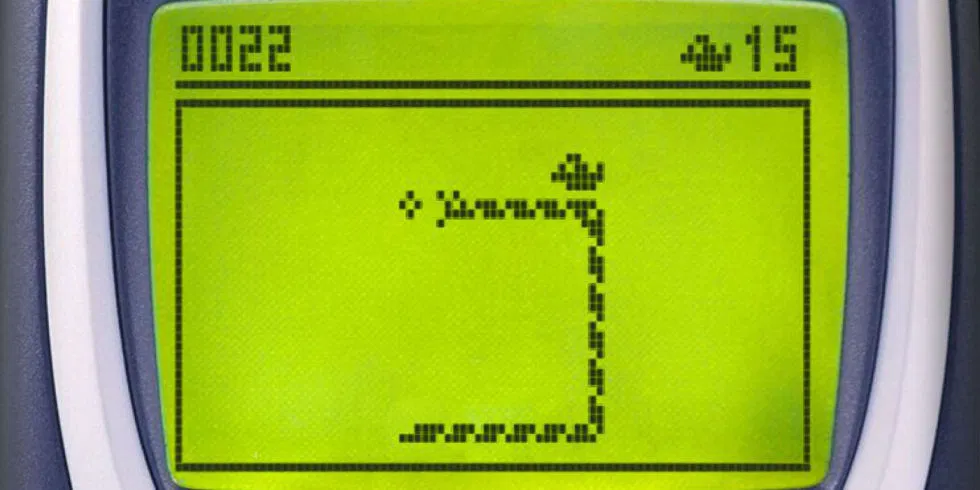
</div>

¡Completa todos los apartados que se muestran a continuación para conseguir implementar estas funciones!

### 1. Explora el paquete por defecto de Python `Turtle`

Esta vez vamos a intentar que nuestro juego tenga una interfaz gráfica una poco más visual que la que implementamos en el juego del cuatro en raya. Para implementar estos gráficos en Python, vamos a utilizar un paquete muy sencillo denominado Turtle.

Turtle es un paquete de Python preinstalado que permite a los usuarios crear imágenes y formas proporcionándoles un lienzo virtual. El lápiz en pantalla que se utiliza para dibujar se llama turtle y esto es lo que da nombre a la biblioteca.

Más información: https://docs.python.org/3/library/turtle.html

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Explora el paquete de Python Turtle y familiarizate con sus estructuras más populares.
</div>

**Pista:** Presta especial atención a las siguientes clases `Screen()` y a los siguientes métodos que exponen los objetos de esta clase: `title()`, `bgcolor()`, `setup()` y `tracer()`.

In [1]:
import turtle

In [2]:
# Crea una pantalla
screen = turtle.Screen()

In [3]:
# Establece el título de la pantalla
screen.title("Esto es el título de la ventana")

In [4]:
# Establece el color de fondo de la pantalla
screen.bgcolor("green")

In [5]:
# Establece el ancho y alto de la pantalla
screen.setup(width = 800, height = 600)

**Pista:** Presta especial atención a las siguientes clases `Turtle()` y a los siguientes métodos que exponen los objetos de esta clase: `goto()`, `speed()`, `shape()`, `color()` `penup()`, `write()`

In [6]:
# Crea un objeto en la pantalla
t = turtle.Turtle()

In [7]:
# Mueve el objeto en la pantalla
t.goto(150, 5)

In [8]:
# Establece la velocidad de movimiento del objeto
# 0 -> 'fastest', 10 -> 'fast', 6 -> 'normal', 3 -> 'slow', 1 ->'slowest'
t.speed(0)

In [9]:
t.goto(200, 30)

In [10]:
# Establece la forma del objeto
t.shape("circle")

In [11]:
t.shape("square")

In [12]:
# Establece el color del objeto
t.color("red")

In [13]:
# Hace que no se dibuje en la pantalla las líneas de los movimientos del objeto
t.penup()

In [14]:
# Establece un texto en el objeto
t.write("Esto es un texto escrito en el lienzo", align = "center", font = ("Curier", 24, "normal"))

In [15]:
t2 = turtle.Turtle()

In [16]:
# Establece la coordenda y del objeto
t2.sety(t2.ycor() + 100)

In [17]:
# Desplaza el objeto hacia adelante
t2.forward(20)

**Pista:** Regresa de nuevo al objeto generado a partir de la clase `Screen()` e intenta mover el objeto turtle utilizando los métodos `listen()` y `onkeypress()`

In [18]:
def move():
    t2.sety(t2.ycor() - 20)

In [20]:
move()

In [21]:
screen.listen()
screen.onkeypress(move, 's')

In [22]:
import time
while True:
    screen.update()
    time.sleep(1)

Terminator: 

In [23]:
screen.mainloop()

Help on method mainloop in module turtle:

mainloop() method of turtle._Screen instance
    Starts event loop - calling Tkinter's mainloop function.
    
    No argument.
    
    Must be last statement in a turtle graphics program.
    Must NOT be used if a script is run from within IDLE in -n mode
    (No subprocess) - for interactive use of turtle graphics.
    
    Example (for a TurtleScreen instance named screen):
    >>> screen.mainloop()



### 2. Clase Snake

Vamos a comenzar creando la pantalla en la que vamos a jugar al juego y la serpiente. Cuando comienza el juego, la serpiente es únicamente un cuadrado en la pantalla.

<div>
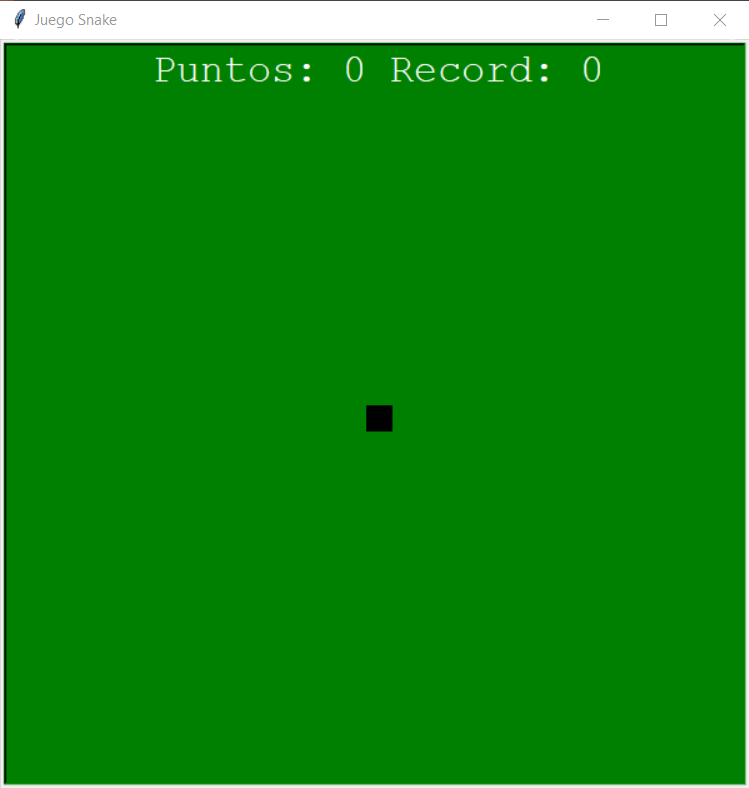
</div>

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Implementa una clase que inicialice la pantalla en la que vamos a jugar al juego, la serpiente y el texto que vamos a mostrar por pantalla.
</div>

In [1]:
import turtle

class JuegoSerpiente:

    def __init__(self, color = "green", ancho = 600, alto = 600):
        """Inicializa los componentes del juego.
        
        Argumento posicionales:
        color -- str que representa el color de fondo del lienzo.
        ancho -- int que indica el ancho del lienzo.
        alto -- int que indica la altura del lienzo.
        """
        # Inicializa el lienzo de la pantalla
        self._pantalla = turtle.Screen()
        self._pantalla.title("Juego Serpiente")
        self._pantalla.bgcolor(color)
        self._pantalla.setup(width = ancho, height = alto)
        # Inicializa la serpiente
        self._serpiente = turtle.Turtle()
        # Establece la velocidad de movimiento del objeto
        # 0 -> 'fastest', 10 -> 'fast', 6 -> 'normal', 3 -> 'slow', 1 ->'slowest'
        self._serpiente.speed(0)
        self._serpiente.shape("square")
        # Opcional porque por defecto es de color negro
        self._serpiente.color("black")
        # No dibuja en el lienzo la línea de movimiento
        self._serpiente.penup()
        # Opcional porque por defecto aparece en el centro
        self._serpiente.goto(0, 0)
        # Incializa el texto que aparece en el lienzo
        self._texto = turtle.Turtle()
        self._texto.color("white")
        # Oculta el puntero
        self._texto.hideturtle()
        # No dibuja en el lienzo la línea de movimiento
        self._texto.penup()
        self._texto.sety(self._texto.ycor() + ((alto / 2) - 40))
        self._texto.write("Puntos: 0 Record: 0", align = "center", font = ("Curier", 24, "normal"))

In [ ]:
juego_snake = JuegoSerpiente()

### 3. Implementa los movimientos de la serpiente

Ya tenemos nuestra pantalla implementada y la serpiente representada como un cuadrado negro. En este punto debemos comenzar a implementar los movimientos de la serpiente por la pantalla.

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Añade a la clase Snake los métodos que consideres necesarios para habilitar el movimiento de serpiente por la pantalla. Ten en cuenta que estos métodos tendrán que invocarse más adelante mediante la pulsación de una tecla.
</div>

In [1]:
import turtle

class JuegoSerpiente:

    def __init__(self, color = "green", ancho = 600, alto = 600):
        """Inicializa los componentes del juego.
        
        Argumento posicionales:
        color -- str que representa el color de fondo del lienzo.
        ancho -- int que indica el ancho del lienzo.
        alto -- int que indica la altura del lienzo.
        """
        # Inicializa el lienzo de la pantalla
        self._pantalla = turtle.Screen()
        self._pantalla.title("Juego Serpiente")
        self._pantalla.bgcolor(color)
        self._pantalla.setup(width = ancho, height = alto)
        # Inicializa la serpiente
        self._serpiente = turtle.Turtle()
        # Establece la velocidad de movimiento del objeto
        # 0 -> 'fastest', 10 -> 'fast', 6 -> 'normal', 3 -> 'slow', 1 ->'slowest'
        self._serpiente.speed(0)
        self._serpiente.shape("square")
        # Opcional porque por defecto es de color negro
        self._serpiente.color("black")
        # No dibuja en el lienzo la línea de movimiento
        self._serpiente.penup()
        # Opcional porque por defecto aparece en el centro
        self._serpiente.goto(0, 0)
        # Incializa el texto que aparece en el lienzo
        self._texto = turtle.Turtle()
        self._texto.color("white")
        # Oculta el puntero
        self._texto.hideturtle()
        # No dibuja en el lienzo la línea de movimiento
        self._texto.penup()
        self._texto.sety(self._texto.ycor() + ((alto / 2) - 40))
        self._texto.write("Puntos: 0 Record: 0", align = "center", font = ("Curier", 24, "normal"))
        self._direccion = None

    # La serpiente no puede ir de abajo hacia arriba directamente
    def arriba(self):
        """Establece la dirección de la serpiente hacia arriba."""
        if self._direccion != "abajo":
            self._direccion = "arriba"

    # La serpiente no puede ir de arriba hacia abajo directamente
    def abajo(self):
        """Establece la dirección de la serpiente hacia abajo."""
        if self._direccion != "arriba":
            self._direccion = "abajo"

    # La serpiente no puede ir de izquierda a derecha directamente
    def derecha(self):
        """Establece la dirección de la serpiente hacia la derecha."""
        if self._direccion != "izquierda":
            self._direccion = "derecha"

    # La serpiente no puede ir de derecha a izquierda directamente
    def izquierda(self):
        """Establece la dirección de la serpiente hacia la izquierda."""
        if self._direccion != "derecha":
            self._direccion = "izquierda"

    def mover(self):
        """Mueve la serpiente una posición en función de la dirección indicada."""
        if self._direccion == "arriba":
            self._serpiente.sety(self._serpiente.ycor() + 20)
        elif self._direccion == "abajo":
            self._serpiente.sety(self._serpiente.ycor() - 20)
        elif self._direccion == "derecha":
            self._serpiente.setx(self._serpiente.xcor() + 20)
        elif self._direccion == "izquierda":
            self._serpiente.setx(self._serpiente.xcor() - 20)

In [ ]:
juego_snake = JuegoSerpiente()

In [ ]:
juego_snake.arriba()

In [ ]:
juego_snake.mover()

In [ ]:
juego_snake.derecha()

In [ ]:
juego_snake.mover()

In [10]:
juego_snake.abajo()

In [12]:
juego_snake.mover()

In [13]:
juego_snake.izquierda()

In [14]:
juego_snake.mover()

### 4. Implementa los movimientos de la serpiente utilizando las teclas

Si has llegado hasta este apartado, ya tienes una parte importante de tu videojuego implementada. Una vez que has conseguido mover la serpiente por la pantalla, ahora debes permitir que estos movimientos se realicen mediante la pulsación de una tecla.

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Implementan el código dentro de la clase Snake y fuera de ella que consideres necesarios para mover la serpiente por la pantalla pulsando una tecla.
</div>

In [1]:
import turtle
import time

class JuegoSerpiente:

    def __init__(self, color = "green", ancho = 600, alto = 600):
        """Inicializa los componentes del juego.
        
        Argumento posicionales:
        color -- str que representa el color de fondo del lienzo.
        ancho -- int que indica el ancho del lienzo.
        alto -- int que indica la altura del lienzo.
        """
        self._ancho = ancho
        self._alto = alto
        self._direccion = None
        self._retardo = 0.1
        # Inicializa el lienzo de la pantalla
        self._pantalla = turtle.Screen()
        self._pantalla.title("Juego Serpiente")
        self._pantalla.bgcolor(color)
        self._pantalla.setup(width = ancho, height = alto)
        # Desactiva la actualización automática de la pantalla
        self._pantalla.tracer(0)
        # Inicializa la serpiente
        self._serpiente = turtle.Turtle()
        # Establece la velocidad de movimiento del objeto
        # 0 -> 'fastest', 10 -> 'fast', 6 -> 'normal', 3 -> 'slow', 1 ->'slowest'
        self._serpiente.speed(0)
        self._serpiente.shape("square")
        # Opcional porque por defecto es de color negro
        self._serpiente.color("black")
        # No dibuja en el lienzo la línea de movimiento
        self._serpiente.penup()
        # Opcional porque por defecto aparece en el centro
        self._serpiente.goto(0, 0)
        # Incializa el texto que aparece en el lienzo
        self._texto = turtle.Turtle()
        self._texto.color("white")
        # Oculta el puntero
        self._texto.hideturtle()
        # No dibuja en el lienzo la línea de movimiento
        self._texto.penup()
        self._texto.sety(self._texto.ycor() + ((alto / 2) - 40))
        self._texto.write("Puntos: 0 Record: 0", align = "center", font = ("Curier", 24, "normal"))
        # Asociación de los movimientos y las teclas
        self._pantalla.listen()
        self._pantalla.onkeypress(self._arriba, 'w')
        self._pantalla.onkeypress(self._abajo, 's')
        self._pantalla.onkeypress(self._derecha, 'd')
        self._pantalla.onkeypress(self._izquierda, 'a')

    # La serpiente no puede ir de abajo hacia arriba directamente
    def _arriba(self):
        """Establece la dirección de la serpiente hacia arriba."""
        if self._direccion != "abajo":
            self._direccion = "arriba"

    # La serpiente no puede ir de arriba hacia abajo directamente
    def _abajo(self):
        """Establece la dirección de la serpiente hacia abajo."""
        if self._direccion != "arriba":
            self._direccion = "abajo"

    # La serpiente no puede ir de izquierda a derecha directamente
    def _derecha(self):
        """Establece la dirección de la serpiente hacia la derecha."""
        if self._direccion != "izquierda":
            self._direccion = "derecha"

    # La serpiente no puede ir de derecha a izquierda directamente
    def _izquierda(self):
        """Establece la dirección de la serpiente hacia la izquierda."""
        if self._direccion != "derecha":
            self._direccion = "izquierda"

    def _mover(self):
        """Mueve la serpiente una posición en función de la dirección indicada."""
        if self._direccion == "arriba":
            self._serpiente.sety(self._serpiente.ycor() + 20)
        elif self._direccion == "abajo":
            self._serpiente.sety(self._serpiente.ycor() - 20)
        elif self._direccion == "derecha":
            self._serpiente.setx(self._serpiente.xcor() + 20)
        elif self._direccion == "izquierda":
            self._serpiente.setx(self._serpiente.xcor() - 20)

    def _colision_borde(self):
        """Detecta si la serpiente ha chocado con alguno de los bordes de la pantalla y, en caso afirmativo, reinicia la partida."""
        bxcor = self._ancho // 2 - 10
        bycor = self._alto // 2 - 10
        if self._serpiente.xcor() > bxcor or self._serpiente.xcor() < -bxcor or \
        self._serpiente.ycor() > bycor or self._serpiente.ycor() < -bycor:
            time.sleep(1)
            self._serpiente.goto(0, 0)
            self._direccion = None
            self._texto.clear()
            self._texto.write("Puntos: 0 Record: 0", align = "center", font = ("Curier", 24, "normal"))
    
    def jugar(self):
        """Da comienzo al juego."""
        while True:
            self._mover()
            time.sleep(self._retardo)
            self._pantalla.update()
            self._colision_borde()

In [2]:
juego_snake = JuegoSerpiente()

In [ ]:
juego_snake.jugar()

### 5. Implementa las colisiones con los bordes

Ya tenemos implementado uno de los comportamientos más importantes de nuestro videojuego como es el movimiento de la serpiente. Sin embargo, podemos observar como la serpiente no respeta los bordes y puede traspasarlos. Implementa las colisiones con los bordes de la pantalla para que se mantenga siempre en el recuadro.

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Implementa los métodos que consideres necesarios para limitar el movimiento de la serpiente a la pantalla que se está mostrando. Si la serpiente choca con un borde, debe volver al centro de la pantalla.
</div>

In [1]:
import turtle
import time
import random

class JuegoSerpiente:

    def __init__(self, color = "green", ancho = 600, alto = 600):
        """Inicializa los componentes del juego.
        
        Argumento posicionales:
        color -- str que representa el color de fondo del lienzo.
        ancho -- int que indica el ancho del lienzo.
        alto -- int que indica la altura del lienzo.
        """
        self._ancho = ancho
        self._alto = alto
        self._direccion = None
        self._retardo = 0.1
        self._puntos = 0
        self._record = 0
        # Inicializa el lienzo de la pantalla
        self._pantalla = turtle.Screen()
        self._pantalla.title("Juego Serpiente")
        self._pantalla.bgcolor(color)
        self._pantalla.setup(width = ancho, height = alto)
        # Desactiva la actualización automática de la pantalla
        self._pantalla.tracer(0)
        # Inicializa la serpiente
        self._serpiente = turtle.Turtle()
        # Establece la velocidad de movimiento del objeto
        # 0 -> 'fastest', 10 -> 'fast', 6 -> 'normal', 3 -> 'slow', 1 ->'slowest'
        self._serpiente.speed(0)
        self._serpiente.shape("square")
        # Opcional porque por defecto es de color negro
        self._serpiente.color("black")
        # No dibuja en el lienzo la línea de movimiento
        self._serpiente.penup()
        # Opcional porque por defecto aparece en el centro
        self._serpiente.goto(0, 0)
        # Inicialización de la comida de la serpiente
        self._comida = turtle.Turtle()
        self._comida.shape("circle")
        self._comida.color("red")
        # No dibuja en el lienzo la línea de movimiento
        self._comida.penup()
        self._comida.goto(0, alto // 2 - 100)
        # Incializa el texto que aparece en el lienzo
        self._texto = turtle.Turtle()
        self._texto.color("white")
        # Oculta el puntero
        self._texto.hideturtle()
        # No dibuja en el lienzo la línea de movimiento
        self._texto.penup()
        self._texto.sety(self._texto.ycor() + ((alto / 2) - 40))
        self._mostar_puntuacion()
        # Asociación de los movimientos y las teclas
        self._pantalla.listen()
        self._pantalla.onkeypress(self._arriba, 'w')
        self._pantalla.onkeypress(self._abajo, 's')
        self._pantalla.onkeypress(self._derecha, 'd')
        self._pantalla.onkeypress(self._izquierda, 'a')

    # La serpiente no puede ir de abajo hacia arriba directamente
    def _arriba(self):
        """Establece la dirección de la serpiente hacia arriba."""
        if self._direccion != "abajo":
            self._direccion = "arriba"

    # La serpiente no puede ir de arriba hacia abajo directamente
    def _abajo(self):
        """Establece la dirección de la serpiente hacia abajo."""
        if self._direccion != "arriba":
            self._direccion = "abajo"

    # La serpiente no puede ir de izquierda a derecha directamente
    def _derecha(self):
        """Establece la dirección de la serpiente hacia la derecha."""
        if self._direccion != "izquierda":
            self._direccion = "derecha"

    # La serpiente no puede ir de derecha a izquierda directamente
    def _izquierda(self):
        """Establece la dirección de la serpiente hacia la izquierda."""
        if self._direccion != "derecha":
            self._direccion = "izquierda"

    def _mover(self):
        """Mueve la serpiente una posición en función de la dirección indicada."""
        if self._direccion == "arriba":
            self._serpiente.sety(self._serpiente.ycor() + 20)
        elif self._direccion == "abajo":
            self._serpiente.sety(self._serpiente.ycor() - 20)
        elif self._direccion == "derecha":
            self._serpiente.setx(self._serpiente.xcor() + 20)
        elif self._direccion == "izquierda":
            self._serpiente.setx(self._serpiente.xcor() - 20)

    def _colision_borde(self):
        """Detecta si la serpiente ha chocado con alguno de los bordes de la pantalla y, en caso afirmativo, reinicia la partida."""
        bxcor = self._ancho // 2 - 10
        bycor = self._alto // 2 - 10
        if self._serpiente.xcor() > bxcor or self._serpiente.xcor() < -bxcor or \
        self._serpiente.ycor() > bycor or self._serpiente.ycor() < -bycor:
            time.sleep(1)
            self._serpiente.goto(0, 0)
            self._direccion = None
            # Reinicia la posición de la comida
            self._comida.goto(0, self._alto // 2 - 100)
            # Reinicia la complejidad del juego
            self._retardo = 0.1
            # Reinicia la puntuación y establece un posible record
            if self._puntos > self._record:
                self._record = self._puntos
            self._puntos = 0
            self._mostar_puntuacion()

    def _colision_comida(self):
        """Detecta si la serpiente ha comido y, en caso afirmativo, genera una nueva comida, aumenta la complejidad del juego y aumenta la puntuación."""
        if self._serpiente.distance(self._comida) < 20:
            # Mover la comida a un lugar aleatorio
            bxcor = self._ancho // 2 - 10
            bycor = self._alto // 2 - 10
            x = random.randint(-bxcor, bxcor)
            y = random.randint(-bycor, bycor)
            self._comida.goto(x, y)
            # Aumentar la complejidad del juego aumentándo la velocidad de la serpiente
            self._retardo -= 0.001
            # Aumentar la puntuación
            self._puntos += 10
            self._mostar_puntuacion()

    def _mostar_puntuacion(self):
        """Muestra el texto con los puntos y el record hasta el momento."""
        self._texto.clear()
        self._texto.write("Puntos: {} Record: {}".format(self._puntos, self._record), align = "center", font = ("Curier", 24, "normal"))
    
    def jugar(self):
        """Da comienzo al juego."""
        while True:
            self._mover()
            time.sleep(self._retardo)
            self._pantalla.update()
            self._colision_borde()
            self._colision_comida()

In [2]:
juego_snake = JuegoSerpiente()

In [ ]:
juego_snake.jugar()

### 6. Implementa la comida de la serpiente

Lo siguiente importante que debemos implementar en nuestro juego es la comida de la serpiente. Esto es lo que nos permite aumentar los puntos y que la serpiente aumente de tamaño. La comida debe aparecer aleatoriamente por la pantalla.

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Implementa los métodos que consideres necesarios para generar la comida de manera aleatoria en la pantalla. La comida debe ser un circulo del mismo tamaño que la serpiente.
</div>

In [1]:
import turtle
import time
import random

class JuegoSerpiente:

    def __init__(self, color = "green", ancho = 600, alto = 600):
        """Inicializa los componentes del juego.
        
        Argumento posicionales:
        color -- str que representa el color de fondo del lienzo.
        ancho -- int que indica el ancho del lienzo.
        alto -- int que indica la altura del lienzo.
        """
        self._ancho = ancho
        self._alto = alto
        self._direccion = None
        self._retardo = 0.1
        self._puntos = 0
        self._record = 0
        self._cuerpo_serpiente = []
        # Inicializa el lienzo de la pantalla
        self._pantalla = turtle.Screen()
        self._pantalla.title("Juego Serpiente")
        self._pantalla.bgcolor(color)
        self._pantalla.setup(width = ancho, height = alto)
        # Desactiva la actualización automática de la pantalla
        self._pantalla.tracer(0)
        # Inicializa la serpiente
        self._serpiente = turtle.Turtle()
        # Establece la velocidad de movimiento del objeto
        # 0 -> 'fastest', 10 -> 'fast', 6 -> 'normal', 3 -> 'slow', 1 ->'slowest'
        self._serpiente.speed(0)
        self._serpiente.shape("square")
        # Opcional porque por defecto es de color negro
        self._serpiente.color("black")
        # No dibuja en el lienzo la línea de movimiento
        self._serpiente.penup()
        # Opcional porque por defecto aparece en el centro
        self._serpiente.goto(0, 0)
        # Inicialización de la comida de la serpiente
        self._comida = turtle.Turtle()
        self._comida.shape("circle")
        self._comida.color("red")
        # No dibuja en el lienzo la línea de movimiento
        self._comida.penup()
        self._comida.goto(0, alto // 2 - 100)
        # Incializa el texto que aparece en el lienzo
        self._texto = turtle.Turtle()
        self._texto.color("white")
        # Oculta el puntero
        self._texto.hideturtle()
        # No dibuja en el lienzo la línea de movimiento
        self._texto.penup()
        self._texto.sety(self._texto.ycor() + ((alto / 2) - 40))
        self._mostar_puntuacion()
        # Asociación de los movimientos y las teclas
        self._pantalla.listen()
        self._pantalla.onkeypress(self._arriba, 'w')
        self._pantalla.onkeypress(self._abajo, 's')
        self._pantalla.onkeypress(self._derecha, 'd')
        self._pantalla.onkeypress(self._izquierda, 'a')

    # La serpiente no puede ir de abajo hacia arriba directamente
    def _arriba(self):
        """Establece la dirección de la serpiente hacia arriba."""
        if self._direccion != "abajo":
            self._direccion = "arriba"

    # La serpiente no puede ir de arriba hacia abajo directamente
    def _abajo(self):
        """Establece la dirección de la serpiente hacia abajo."""
        if self._direccion != "arriba":
            self._direccion = "abajo"

    # La serpiente no puede ir de izquierda a derecha directamente
    def _derecha(self):
        """Establece la dirección de la serpiente hacia la derecha."""
        if self._direccion != "izquierda":
            self._direccion = "derecha"

    # La serpiente no puede ir de derecha a izquierda directamente
    def _izquierda(self):
        """Establece la dirección de la serpiente hacia la izquierda."""
        if self._direccion != "derecha":
            self._direccion = "izquierda"

    def _mover(self):
        """Mueve la serpiente una posición en función de la dirección indicada."""
        # Obtenemos las coordenadas de la cabeza de la serpiente
        hx, hy = self._serpiente.xcor(), self._serpiente.ycor()
        # Movemos el cuerpo de la serpiente(todos los segmentos menos el más cercano a la cabeza empezándo por el último)
        for i in range(len(self._cuerpo_serpiente) - 1, 0, -1):
            x = self._cuerpo_serpiente[i - 1].xcor()
            y = self._cuerpo_serpiente[i - 1].ycor()
            self._cuerpo_serpiente[i].goto(x, y)
        # Movemos el segmento más cercano a la cabeza que será la nueva cabeza de la serpiente
        if len(self._cuerpo_serpiente) > 0:
            self._cuerpo_serpiente[0].goto(hx, hy)
        # Movemos la cabeza
        if self._direccion == "arriba":
            self._serpiente.sety(hy + 20)
        elif self._direccion == "abajo":
            self._serpiente.sety(hy - 20)
        elif self._direccion == "derecha":
            self._serpiente.setx(hx + 20)
        elif self._direccion == "izquierda":
            self._serpiente.setx(hx - 20)

    def _colision_borde(self):
        """Detecta si la serpiente ha chocado con alguno de los bordes de la pantalla y, en caso afirmativo, reinicia la partida."""
        bxcor = self._ancho // 2 - 10
        bycor = self._alto // 2 - 10
        if self._serpiente.xcor() > bxcor or self._serpiente.xcor() < -bxcor or \
        self._serpiente.ycor() > bycor or self._serpiente.ycor() < -bycor:
            time.sleep(1)
            self._serpiente.goto(0, 0)
            self._direccion = None
            # Reinicia el cuerpo de la serpiente
            # Ocultamos los segmentos del cuerpo de la serpiente en la pantalla
            for s in self._cuerpo_serpiente:
                s.ht()
            self._cuerpo_serpiente.clear()
            # Reinicia la posición de la comida
            self._comida.goto(0, self._alto // 2 - 100)
            # Reinicia la complejidad del juego
            self._retardo = 0.1
            # Reinicia la puntuación y establece un posible record
            if self._puntos > self._record:
                self._record = self._puntos
            self._puntos = 0
            self._mostar_puntuacion()

    def _incrementar_cuerpo(self):
        """Añade un nuevo segmento al cuerpo de la serpiente."""
        segmento = turtle.Turtle()
        segmento.shape("square")
        segmento.color("grey")
        segmento.speed(0)
        segmento.penup()
        self._cuerpo_serpiente.append(segmento)

    def _colision_comida(self):
        """Detecta si la serpiente ha comido y, en caso afirmativo, genera una nueva comida, aumenta la complejidad del juego y aumenta la puntuación."""
        if self._serpiente.distance(self._comida) < 20:
            # Mover la comida a un lugar aleatorio
            bxcor = self._ancho // 2 - 10
            bycor = self._alto // 2 - 10
            x = random.randint(-bxcor, bxcor)
            y = random.randint(-bycor, bycor)
            self._comida.goto(x, y)
            # Incrementar el cuerpo de la serpiente
            self._incrementar_cuerpo()
            # Aumentar la complejidad del juego aumentándo la velocidad de la serpiente
            self._retardo -= 0.001
            # Aumentar la puntuación
            self._puntos += 10
            self._mostar_puntuacion()

    def _mostar_puntuacion(self):
        """Muestra el texto con los puntos y el record hasta el momento."""
        self._texto.clear()
        self._texto.write("Puntos: {} Record: {}".format(self._puntos, self._record), align = "center", font = ("Curier", 24, "normal"))
    
    def jugar(self):
        """Da comienzo al juego."""
        while True:
            self._mover()
            time.sleep(self._retardo)
            self._pantalla.update()
            self._colision_borde()
            self._colision_comida()

In [2]:
juego_snake = JuegoSerpiente()

In [ ]:
juego_snake.jugar()

### 7. Implementa el aumento del tamaño de la serpiente

La siguiente funcionalidad que debemos implementar es el aumento de puntuación y tamaño de la serpiente como cuando come la comida que hemos implementado anteriormente.

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Implementa los métodos que consideres necesarios para aumentar la puntuación y el tamaño de la serpiente cuando come la comida implementada en el apartado anterior.
</div>

In [1]:
import turtle
import time
import random

class JuegoSerpiente:

    def __init__(self, color = "green", ancho = 600, alto = 600):
        """Inicializa los componentes del juego.
        
        Argumento posicionales:
        color -- str que representa el color de fondo del lienzo.
        ancho -- int que indica el ancho del lienzo.
        alto -- int que indica la altura del lienzo.
        """
        self._ancho = ancho
        self._alto = alto
        self._direccion = None
        self._retardo = 0.1
        self._puntos = 0
        self._record = 0
        self._cuerpo_serpiente = []
        # Inicializa el lienzo de la pantalla
        self._pantalla = turtle.Screen()
        self._pantalla.title("Juego Serpiente")
        self._pantalla.bgcolor(color)
        self._pantalla.setup(width = ancho, height = alto)
        # Desactiva la actualización automática de la pantalla
        self._pantalla.tracer(0)
        # Inicializa la serpiente
        self._serpiente = turtle.Turtle()
        # Establece la velocidad de movimiento del objeto
        # 0 -> 'fastest', 10 -> 'fast', 6 -> 'normal', 3 -> 'slow', 1 ->'slowest'
        self._serpiente.speed(0)
        self._serpiente.shape("square")
        # Opcional porque por defecto es de color negro
        self._serpiente.color("black")
        # No dibuja en el lienzo la línea de movimiento
        self._serpiente.penup()
        # Opcional porque por defecto aparece en el centro
        self._serpiente.goto(0, 0)
        # Inicialización de la comida de la serpiente
        self._comida = turtle.Turtle()
        self._comida.shape("circle")
        self._comida.color("red")
        # No dibuja en el lienzo la línea de movimiento
        self._comida.penup()
        self._comida.goto(0, alto // 2 - 100)
        # Incializa el texto que aparece en el lienzo
        self._texto = turtle.Turtle()
        self._texto.color("white")
        # Oculta el puntero
        self._texto.hideturtle()
        # No dibuja en el lienzo la línea de movimiento
        self._texto.penup()
        self._texto.sety(self._texto.ycor() + ((alto / 2) - 40))
        self._mostar_puntuacion()
        # Asociación de los movimientos y las teclas
        self._pantalla.listen()
        self._pantalla.onkeypress(self._arriba, 'w')
        self._pantalla.onkeypress(self._abajo, 's')
        self._pantalla.onkeypress(self._derecha, 'd')
        self._pantalla.onkeypress(self._izquierda, 'a')

    # La serpiente no puede ir de abajo hacia arriba directamente
    def _arriba(self):
        """Establece la dirección de la serpiente hacia arriba."""
        if self._direccion != "abajo":
            self._direccion = "arriba"

    # La serpiente no puede ir de arriba hacia abajo directamente
    def _abajo(self):
        """Establece la dirección de la serpiente hacia abajo."""
        if self._direccion != "arriba":
            self._direccion = "abajo"

    # La serpiente no puede ir de izquierda a derecha directamente
    def _derecha(self):
        """Establece la dirección de la serpiente hacia la derecha."""
        if self._direccion != "izquierda":
            self._direccion = "derecha"

    # La serpiente no puede ir de derecha a izquierda directamente
    def _izquierda(self):
        """Establece la dirección de la serpiente hacia la izquierda."""
        if self._direccion != "derecha":
            self._direccion = "izquierda"

    def _mover(self):
        """Mueve la serpiente una posición en función de la dirección indicada."""
        # Obtenemos las coordenadas de la cabeza de la serpiente
        hx, hy = self._serpiente.xcor(), self._serpiente.ycor()
        # Movemos el cuerpo de la serpiente(todos los segmentos menos el más cercano a la cabeza empezándo por el último)
        for i in range(len(self._cuerpo_serpiente) - 1, 0, -1):
            x = self._cuerpo_serpiente[i - 1].xcor()
            y = self._cuerpo_serpiente[i - 1].ycor()
            self._cuerpo_serpiente[i].goto(x, y)
        # Movemos el segmento más cercano a la cabeza que será la nueva cabeza de la serpiente
        if len(self._cuerpo_serpiente) > 0:
            self._cuerpo_serpiente[0].goto(hx, hy)
        # Movemos la cabeza
        if self._direccion == "arriba":
            self._serpiente.sety(hy + 20)
        elif self._direccion == "abajo":
            self._serpiente.sety(hy - 20)
        elif self._direccion == "derecha":
            self._serpiente.setx(hx + 20)
        elif self._direccion == "izquierda":
            self._serpiente.setx(hx - 20)

    def _reiniciar_juego(self):
        """Reinicia el juego."""
        time.sleep(1)
        self._serpiente.goto(0, 0)
        self._direccion = None
        # Reinicia el cuerpo de la serpiente
        # Ocultamos los segmentos del cuerpo de la serpiente en la pantalla
        for s in self._cuerpo_serpiente:
            s.ht()
        self._cuerpo_serpiente.clear()
        # Reinicia la posición de la comida
        self._comida.goto(0, self._alto // 2 - 100)
        # Reinicia la complejidad del juego
        self._retardo = 0.1
        # Reinicia la puntuación y establece un posible record
        if self._puntos > self._record:
            self._record = self._puntos
        self._puntos = 0
        self._mostar_puntuacion()

    def _colision_borde(self):
        """Detecta si la serpiente ha chocado con alguno de los bordes de la pantalla y, en caso afirmativo, reinicia el juego."""
        bxcor = self._ancho // 2 - 10
        bycor = self._alto // 2 - 10
        if self._serpiente.xcor() > bxcor or self._serpiente.xcor() < -bxcor or \
        self._serpiente.ycor() > bycor or self._serpiente.ycor() < -bycor:
            self._reiniciar_juego()

    def _colision_cuerpo(self):
        """Detecta si la serpiente ha chocado con alguno de los segmentos de su cuerpo y, en caso afirmativo, reinicia el juego."""
        for s in self._cuerpo_serpiente:
            if self._serpiente.distance(s) < 20:
                self._reiniciar_juego()
                break

    def _incrementar_cuerpo(self):
        """Añade un nuevo segmento al cuerpo de la serpiente."""
        segmento = turtle.Turtle()
        segmento.shape("square")
        segmento.color("grey")
        segmento.speed(0)
        segmento.penup()
        self._cuerpo_serpiente.append(segmento)

    def _colision_comida(self):
        """Detecta si la serpiente ha comido y, en caso afirmativo, genera una nueva comida, aumenta la complejidad del juego y aumenta la puntuación."""
        if self._serpiente.distance(self._comida) < 20:
            # Mover la comida a un lugar aleatorio
            bxcor = self._ancho // 2 - 10
            bycor = self._alto // 2 - 10
            x = random.randint(-bxcor, bxcor)
            y = random.randint(-bycor, bycor)
            self._comida.goto(x, y)
            # Incrementar el cuerpo de la serpiente
            self._incrementar_cuerpo()
            # Aumentar la complejidad del juego aumentándo la velocidad de la serpiente
            self._retardo -= 0.001
            # Aumentar la puntuación
            self._puntos += 10
            self._mostar_puntuacion()

    def _mostar_puntuacion(self):
        """Muestra el texto con los puntos y el record hasta el momento."""
        self._texto.clear()
        self._texto.write("Puntos: {} Record: {}".format(self._puntos, self._record), align = "center", font = ("Curier", 24, "normal"))
    
    def jugar(self):
        """Da comienzo al juego."""
        while True:
            self._mover()
            time.sleep(self._retardo)
            self._pantalla.update()
            self._colision_borde()
            self._colision_cuerpo()
            self._colision_comida()

In [2]:
juego_snake = JuegoSerpiente()

In [ ]:
juego_snake.jugar()

### 8. Implementa las colisiones con el cuerpo de la serpiente

¡Enhorabuena! Ya casi has completado la implementación de tu videojuego. Lo único que te queda por añadir son las colisiones con el propio cuerpo de la serpiente.

<div style="background-color:#D9EEFF;color:black;padding:2%;">
Implementa los métodos que consideres necesarios para introducir colisiones con el propio cuerpo de la serpiente.
</div>

### 9. Ejecuta el ejercicio en Pycharm